# Models
## Aim: To Identify the Most Important Features in Minimising Lap Time

## Feature Selection Techniques
#### Exploring Which Features May be Significant

### Univariate Feature Selection

In [ ]:
# correlation feature selection for numerical data
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

data = pd.read_csv('trainingDatav3.1.csv')

# Drop rows with NA values from the data 
data.dropna(axis=0, inplace=True)

# Select features
y = data['NORMALISED_LAP_TIME_MS']
X = data[['d0_speed', 'd0_throttle', 'd0_brake', 'd0_lateral', 'd0_steering', 'd0_gear', 'd0_rpm',
'd10_speed', 'd10_throttle', 'd10_brake', 'd10_lateral', 'd10_steering', 'd10_gear', 'd10_rpm',
'd20_speed', 'd20_throttle', 'd20_brake', 'd20_lateral', 'd20_steering', 'd20_gear', 'd20_rpm',
'd30_speed', 'd30_throttle', 'd30_brake', 'd30_lateral', 'd30_steering', 'd30_gear', 'd30_rpm',
'd40_speed', 'd40_throttle', 'd40_brake', 'd40_lateral', 'd40_steering', 'd40_gear', 'd40_rpm',
'd45_speed', 'd45_throttle', 'd45_brake', 'd45_lateral', 'd45_steering', 'd45_gear', 'd45_rpm',
'd50_speed', 'd50_throttle', 'd50_brake', 'd50_lateral', 'd50_steering', 'd50_gear', 'd50_rpm',
'd60_speed', 'd60_throttle', 'd60_brake', 'd60_lateral', 'd60_steering', 'd60_gear', 'd60_rpm',
'd70_speed', 'd70_throttle', 'd70_brake', 'd70_lateral', 'd70_steering', 'd70_gear', 'd70_rpm',
'd80_speed', 'd80_throttle', 'd80_brake', 'd80_lateral', 'd80_steering', 'd80_gear', 'd80_rpm',
'd90_speed', 'd90_throttle', 'd90_brake', 'd90_lateral', 'd90_steering', 'd90_gear', 'd90_rpm']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

predictors = list(X.columns)

# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)

# what are scores for the features
predictors = list(X.columns)
for i in range(len(fs.scores_)):
	print('%s: %f' % (predictors[i], fs.scores_[i]))

d0_speed: 147.697286
d0_throttle: 112.224368
d0_brake: 0.386021
d0_lateral: 65.371658
d0_steering: 0.503475
d0_gear: 129.398060
d0_rpm: 26.439848
d10_speed: 158.909229
d10_throttle: 96.863906
d10_brake: 0.061331
d10_lateral: 52.176056
d10_steering: 5.732575
d10_gear: 140.206683
d10_rpm: 44.309460
d20_speed: 158.272722
d20_throttle: 58.890774
d20_brake: 1.662968
d20_lateral: 109.462122
d20_steering: 2.589364
d20_gear: 132.681070
d20_rpm: 67.384509
d30_speed: 117.298474
d30_throttle: 6.688121
d30_brake: 98.009287
d30_lateral: 94.481453
d30_steering: 0.755901
d30_gear: 149.122075
d30_rpm: 4.243881
d40_speed: 1.877931
d40_throttle: 10.818433
d40_brake: 0.821773
d40_lateral: 0.004384
d40_steering: 45.359503
d40_gear: 0.454777
d40_rpm: 27.177140
d45_speed: 92.809564
d45_throttle: 50.517507
d45_brake: 21.402419
d45_lateral: 58.231846
d45_steering: 1.296515
d45_gear: 59.499608
d45_rpm: 67.493938
d50_speed: 320.474097
d50_throttle: 145.091058
d50_brake: 39.738269
d50_lateral: 58.189186
d50_stee

### Sequential Feature Selection: Forward/Backward Stepwise Selection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeCV

data = pd.read_csv('trainingDatav3.1.csv')

# Drop rows with NA values from the data 
data.dropna(axis=0, inplace=True)

# Select features
y = data['NORMALISED_LAP_TIME_MS']
X = data[['d0_speed', 'd0_throttle', 'd0_brake', 'd0_lateral', 'd0_steering', 'd0_gear', 'd0_rpm',
'd10_speed', 'd10_throttle', 'd10_brake', 'd10_lateral', 'd10_steering', 'd10_gear', 'd10_rpm',
'd20_speed', 'd20_throttle', 'd20_brake', 'd20_lateral', 'd20_steering', 'd20_gear', 'd20_rpm',
'd30_speed', 'd30_throttle', 'd30_brake', 'd30_lateral', 'd30_steering', 'd30_gear', 'd30_rpm',
'd40_speed', 'd40_throttle', 'd40_brake', 'd40_lateral', 'd40_steering', 'd40_gear', 'd40_rpm',
'd45_speed', 'd45_throttle', 'd45_brake', 'd45_lateral', 'd45_steering', 'd45_gear', 'd45_rpm',
'd50_speed', 'd50_throttle', 'd50_brake', 'd50_lateral', 'd50_steering', 'd50_gear', 'd50_rpm',
'd60_speed', 'd60_throttle', 'd60_brake', 'd60_lateral', 'd60_steering', 'd60_gear', 'd60_rpm',
'd70_speed', 'd70_throttle', 'd70_brake', 'd70_lateral', 'd70_steering', 'd70_gear', 'd70_rpm',
'd80_speed', 'd80_throttle', 'd80_brake', 'd80_lateral', 'd80_steering', 'd80_gear', 'd80_rpm',
'd90_speed', 'd90_throttle', 'd90_brake', 'd90_lateral', 'd90_steering', 'd90_gear', 'd90_rpm']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

predictors = list(X.columns)


ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_train, y_train)
feature_names = np.array(X_train.columns)

for i in range(1,len(X_train.columns) - 1):

    sfs_forward = SequentialFeatureSelector(ridge, n_features_to_select=i, direction="forward").fit(X_train, y_train)

    sfs_backward = SequentialFeatureSelector(ridge, n_features_to_select=i, direction="backward").fit(X_train, y_train)
    
    print(f"For {i} variables:")
    print(
        "Features selected by forward sequential selection: "
        f"{feature_names[sfs_forward.get_support()]}"
    )
    print(
        "Features selected by backward sequential selection: "
        f"{feature_names[sfs_backward.get_support()]}"
    )

KeyboardInterrupt: 

# Models

## Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet

data = pd.read_csv('trainingDatav3.1.csv')

# Drop rows with NA values from the data 
data.dropna(axis=0, inplace=True)

# Select features
y = data['NORMALISED_LAP_TIME_MS']
X = data[['d0_speed', 'd0_throttle', 'd0_brake', 'd0_lateral', 'd0_steering', 'd0_gear', 'd0_rpm',
'd10_speed', 'd10_throttle', 'd10_brake', 'd10_lateral', 'd10_steering', 'd10_gear', 'd10_rpm',
'd20_speed', 'd20_throttle', 'd20_brake', 'd20_lateral', 'd20_steering', 'd20_gear', 'd20_rpm',
'd30_speed', 'd30_throttle', 'd30_brake', 'd30_lateral', 'd30_steering', 'd30_gear', 'd30_rpm',
'd40_speed', 'd40_throttle', 'd40_brake', 'd40_lateral', 'd40_steering', 'd40_gear', 'd40_rpm',
'd45_speed', 'd45_throttle', 'd45_brake', 'd45_lateral', 'd45_steering', 'd45_gear', 'd45_rpm',
'd50_speed', 'd50_throttle', 'd50_brake', 'd50_lateral', 'd50_steering', 'd50_gear', 'd50_rpm',
'd60_speed', 'd60_throttle', 'd60_brake', 'd60_lateral', 'd60_steering', 'd60_gear', 'd60_rpm',
'd70_speed', 'd70_throttle', 'd70_brake', 'd70_lateral', 'd70_steering', 'd70_gear', 'd70_rpm',
'd80_speed', 'd80_throttle', 'd80_brake', 'd80_lateral', 'd80_steering', 'd80_gear', 'd80_rpm',
'd90_speed', 'd90_throttle', 'd90_brake', 'd90_lateral', 'd90_steering', 'd90_gear', 'd90_rpm']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an Elastic Net model
alpha = 0.5  # Controls the strength of the regularization
l1_ratio = 0.5  # Mixing parameter between L1 and L2 regularization
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
elastic_net.fit(X_train, y_train)

# Make predictions on the test set
y_pred = elastic_net.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 67538183.70671874


## LASSO Regression

In [ ]:
import pandas as pd
from sklearn.linear_model import LassoCV, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

data = pd.read_csv('trainingDatav3.1.csv')

# Drop rows with NA values from the data 
data.dropna(axis=0, inplace=True)

# Select features
y = data['NORMALISED_LAP_TIME_MS']
X = data[['d0_speed', 'd0_throttle', 'd0_brake', 'd0_lateral', 'd0_steering', 'd0_gear', 'd0_rpm',
'd10_speed', 'd10_throttle', 'd10_brake', 'd10_lateral', 'd10_steering', 'd10_gear', 'd10_rpm',
'd20_speed', 'd20_throttle', 'd20_brake', 'd20_lateral', 'd20_steering', 'd20_gear', 'd20_rpm',
'd30_speed', 'd30_throttle', 'd30_brake', 'd30_lateral', 'd30_steering', 'd30_gear', 'd30_rpm',
'd40_speed', 'd40_throttle', 'd40_brake', 'd40_lateral', 'd40_steering', 'd40_gear', 'd40_rpm',
'd45_speed', 'd45_throttle', 'd45_brake', 'd45_lateral', 'd45_steering', 'd45_gear', 'd45_rpm',
'd50_speed', 'd50_throttle', 'd50_brake', 'd50_lateral', 'd50_steering', 'd50_gear', 'd50_rpm',
'd60_speed', 'd60_throttle', 'd60_brake', 'd60_lateral', 'd60_steering', 'd60_gear', 'd60_rpm',
'd70_speed', 'd70_throttle', 'd70_brake', 'd70_lateral', 'd70_steering', 'd70_gear', 'd70_rpm',
'd80_speed', 'd80_throttle', 'd80_brake', 'd80_lateral', 'd80_steering', 'd80_gear', 'd80_rpm',
'd90_speed', 'd90_throttle', 'd90_brake', 'd90_lateral', 'd90_steering', 'd90_gear', 'd90_rpm']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

predictors = list(X.columns)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform Lasso regression with cross-validation
lasso_cv = LassoCV(cv=10)
lasso_cv.fit(X_train_scaled, y_train)
alpha = lasso_cv.alpha_

# Train 10 predictors with parameter ˆα
lasso_models = []
for i in range(10):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    lasso_models.append(lasso)

# Train new Lasso predictor with α = ˆα on all the training data
lasso_final = Lasso(alpha=alpha)
lasso_final.fit(X_train_scaled, y_train)
y_pred_final = lasso_final.predict(X_test_scaled)
final_mse = mean_squared_error(y_test, y_pred_final)
print("MSE: ", final_mse)


# Count the number of non-zero coefficients in each Lasso predictor
lasso_avg_sparsity = np.mean([np.sum(lasso.coef_ != 0) for lasso in lasso_models])
lasso_final_sparsity = np.sum(lasso_final.coef_ != 0)
coeffs = lasso.coef_  

# Print predictors selected
predictors_selected_lasso = []
for i in range(len(predictors)):
    if coeffs[i] != 0:
        print(f"{predictors[i]}: {coeffs[i]}") 
        predictors_selected_lasso.append(predictors[i])

print(predictors_selected_lasso)

print(f"Sparsity: {lasso_final_sparsity}")

MSE:  67754631.33117256
d0_speed: 538.6612002835637
d0_lateral: 34.83318474185652
d0_steering: -452.88361209834096
d0_gear: 120.74163390781585
d0_rpm: -167.73073909272608
d10_throttle: 131.85686099720772
d10_brake: -47.70036514728212
d10_steering: 189.08113050794728
d10_rpm: 73.14319710204312
d20_throttle: 518.1083344448764
d20_brake: -31.60795312789289
d20_lateral: 519.7715720613409
d20_steering: -352.4796491201731
d20_rpm: -49.57811670333059
d30_brake: -188.6049445242529
d30_lateral: -292.36497424977426
d30_steering: 97.38089129044947
d30_gear: -969.0532585946115
d30_rpm: 223.45496738691298
d40_speed: 1185.2189445833853
d40_throttle: 252.46772920191856
d40_brake: -457.5535877360483
d40_lateral: -397.74859949258297
d40_rpm: -506.0984301089179
d45_speed: -1025.9924197140715
d45_throttle: 482.8249762729646
d45_steering: -879.0159668248128
d45_gear: -288.4834265900635
d50_throttle: 630.94934620187
d50_brake: 876.1596888335231
d50_lateral: 527.6066241717705
d50_steering: -58.7331186424216

## Random Forest 

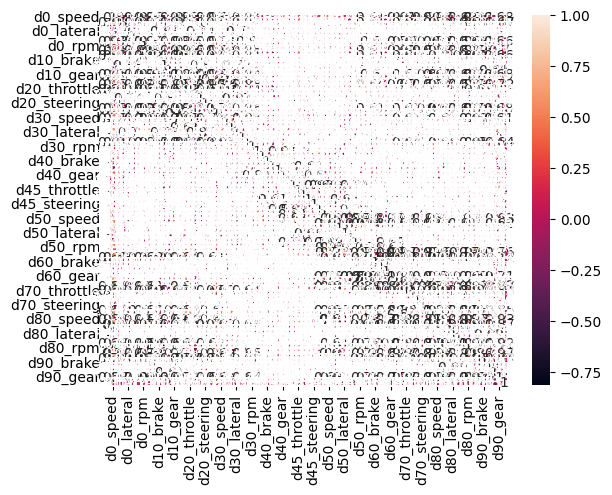

45161900.45004104
6720.2604451048655
100


In [10]:
# Read the data in and split into train and test sets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings('ignore')

#data = pd.read_csv('combinedData.csv')
data = pd.read_csv('trainingDatav3.1.csv')

# data = pd.read_csv('filtCars_goodLaps.csv')

# Drop rows with NA values from the data 
data.dropna(axis=0, inplace=True)

# Select features
y = data['NORMALISED_LAP_TIME_MS']
#y = data['ValidLap_4wheels']
# X = data[['d0_speed', 'd0_throttle', 'd0_brake', 'd0_lateral', 'd0_steering', 'd0_gear', 'd0_rpm']]
#X = data[['d10_speed', 'd10_throttle', 'd10_brake', 'd10_lateral', 'd10_steering', 'd10_gear', 'd10_rpm']]
#X = data[['d20_speed', 'd20_throttle', 'd20_brake', 'd20_lateral', 'd20_steering', 'd20_gear', 'd20_rpm']]
#X = data[['d30_speed', 'd30_throttle', 'd30_brake', 'd30_lateral', 'd30_steering', 'd30_gear', 'd30_rpm']]
#X = data[['d40_speed', 'd40_throttle', 'd40_brake', 'd40_lateral', 'd40_steering', 'd40_gear', 'd40_rpm']]
#X = data[['d45_speed', 'd45_throttle', 'd45_brake', 'd45_lateral', 'd45_steering', 'd45_gear', 'd45_rpm']]
# X = data[['d50_speed', 'd50_throttle', 'd50_brake', 'd50_lateral', 'd50_steering', 'd50_gear', 'd50_rpm']]
#X = data[['d60_speed', 'd60_throttle', 'd60_brake', 'd60_lateral', 'd60_steering', 'd60_gear', 'd60_rpm']]
#X = data[['d70_speed', 'd70_throttle', 'd70_brake', 'd70_lateral', 'd70_steering', 'd70_gear', 'd70_rpm']]
#X = data[['d80_speed', 'd80_throttle', 'd80_brake', 'd80_lateral', 'd80_steering', 'd80_gear', 'd80_rpm']]
#X = data[['d90_speed', 'd90_throttle', 'd90_brake', 'd90_lateral', 'd90_steering', 'd90_gear', 'd90_rpm']]
X = data[['d0_speed', 'd0_throttle', 'd0_brake', 'd0_lateral', 'd0_steering', 'd0_gear', 'd0_rpm',
'd10_speed', 'd10_throttle', 'd10_brake', 'd10_lateral', 'd10_steering', 'd10_gear', 'd10_rpm',
'd20_speed', 'd20_throttle', 'd20_brake', 'd20_lateral', 'd20_steering', 'd20_gear', 'd20_rpm',
'd30_speed', 'd30_throttle', 'd30_brake', 'd30_lateral', 'd30_steering', 'd30_gear', 'd30_rpm',
'd40_speed', 'd40_throttle', 'd40_brake', 'd40_lateral', 'd40_steering', 'd40_gear', 'd40_rpm',
'd45_speed', 'd45_throttle', 'd45_brake', 'd45_lateral', 'd45_steering', 'd45_gear', 'd45_rpm',
'd50_speed', 'd50_throttle', 'd50_brake', 'd50_lateral', 'd50_steering', 'd50_gear', 'd50_rpm',
'd60_speed', 'd60_throttle', 'd60_brake', 'd60_lateral', 'd60_steering', 'd60_gear', 'd60_rpm',
'd70_speed', 'd70_throttle', 'd70_brake', 'd70_lateral', 'd70_steering', 'd70_gear', 'd70_rpm',
'd80_speed', 'd80_throttle', 'd80_brake', 'd80_lateral', 'd80_steering', 'd80_gear', 'd80_rpm',
'd90_speed', 'd90_throttle', 'd90_brake', 'd90_lateral', 'd90_steering', 'd90_gear', 'd90_rpm']]


## PLOT CORRELATIONS

correlation_matrix = X.corr().round(4)

sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Split data into 80-20 train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random forest model 
def random_forest(start, finish, increment):

    # Hold MSE values 
    mse_vals = []
    # Hold number of trees values 
    num_of_trees = []

    # Loop via number of decision trees to locate the model with the lowest MSE
    for i in range(start, finish+1, increment):

        random_forest_mod = RandomForestRegressor(n_estimators=i, random_state=42)

        # Fit the model with training data 
        random_forest_mod.fit(X_train, y_train)

        # Run predictions 
        random_forest_pred = random_forest_mod.predict(X_test)

        # Evaluate model 
        mse = mean_squared_error(y_test, random_forest_pred)

        # Append to mse_vals 
        mse_vals.append(mse)
        
        # Append to num_of_trees
        num_of_trees.append(i)  
    
    # Dictionary to store value for the number of trees and their respective MSE values 
    eval_random_forest = dict(zip(num_of_trees, mse_vals))

    # Locate the number of trees with the lowest MSE 
    for key, val in eval_random_forest.items():
        if val == min(mse_vals):
            return key 

# Call the random_forest function
# start -> number of trees to start with 
# finish -> number of trees to end with 
# increment -> increment number by
optimal_num_of_trees = random_forest(start = 100, finish = 500, increment = 50)

# Run the model with the optimal number of trees
random_forest_mod = RandomForestRegressor(n_estimators=optimal_num_of_trees, random_state=42)
random_forest_mod.fit(X_train, y_train)
random_forest_pred = random_forest_mod.predict(X_test)

random_forest_mse = mean_squared_error(y_test, random_forest_pred)
print(random_forest_mse)
print(np.sqrt(random_forest_mse))
print(optimal_num_of_trees)


In [7]:
from sklearn.model_selection import cross_val_score
np.set_printoptions(suppress=True)

cv_score = cross_val_score(random_forest_mod, X, y, cv=5, scoring='neg_mean_squared_error')
cv_score = -cv_score

print(cv_score)

training_mse = mean_squared_error(y_train, (random_forest_mod.predict(X_train)))
print(training_mse)


[8.38504135e+06 1.15728718e+07 2.31683687e+07 5.14261002e+07
 3.02282134e+08]
6687370.039141367


Because the training set's mse value is much lower that the test set's mse, this is an indicator of overfitting. Also, since the CV values for each subset is so much larger than the training set's mse value, this confirms overfitting. 

In [3]:
testter = pd.DataFrame(y_test)

testter.rename(columns={"NORMALISED_LAP_TIME_MS":"actual"},inplace = True)
#testter.rename(columns={"ValidLap_4wheels":"actual"},inplace = True)

testter["pred"] = random_forest_pred

testter.round(1)

testter["dif"] = round(testter.actual - testter.pred,2)
testter["sqErr"] = (testter.dif)*(testter.dif)
testter["absErr"] = np.sqrt(testter.sqErr)

testter.head()

min(testter['dif'])
max(testter['dif'])

goodLaps = testter[testter["actual"] < 20000]

print(testter.mean())
print(goodLaps.mean())

print(testter.iloc[6])


actual    1.749716e+04
pred      1.675407e+04
dif       7.430882e+02
sqErr     4.516190e+07
absErr    2.203878e+03
dtype: float64
actual    1.417323e+04
pred      1.461091e+04
dif      -4.376794e+02
sqErr     3.761578e+06
absErr    6.058903e+02
dtype: float64
actual    2.976493e+04
pred      2.013770e+04
dif       9.627240e+03
sqErr     9.268375e+07
absErr    9.627240e+03
Name: 795, dtype: float64


       Feature  Importance
3   d0_lateral    0.297318
0     d0_speed    0.268482
4  d0_steering    0.189643
6       d0_rpm    0.163877
1  d0_throttle    0.068583
5      d0_gear    0.010981
2     d0_brake    0.001115


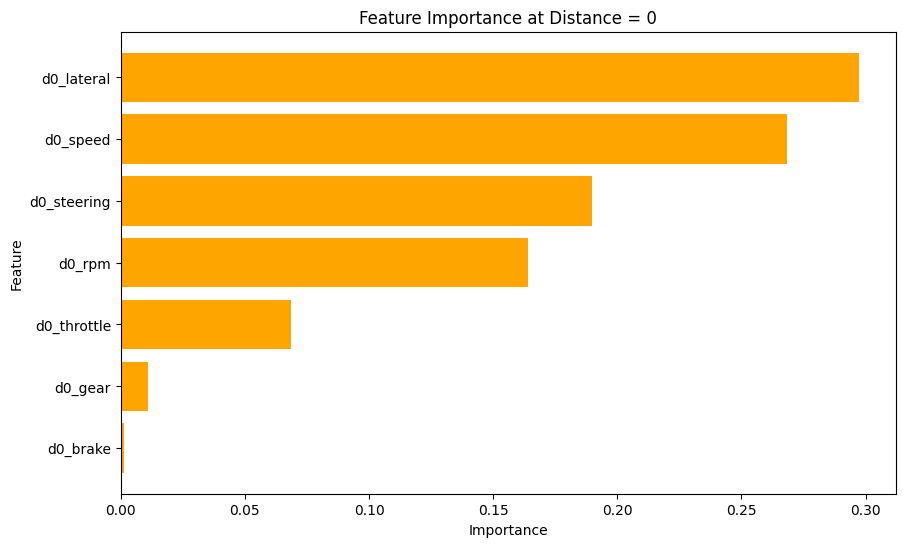

In [9]:
# Feature importance  
feature_importances = random_forest_mod.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace = True)

print(feature_importance_df)

plt.figure(figsize = (10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='orange')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance at Distance = 0")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
feature_importance_df.to_excel("feature_importances.xlsx", index=False)

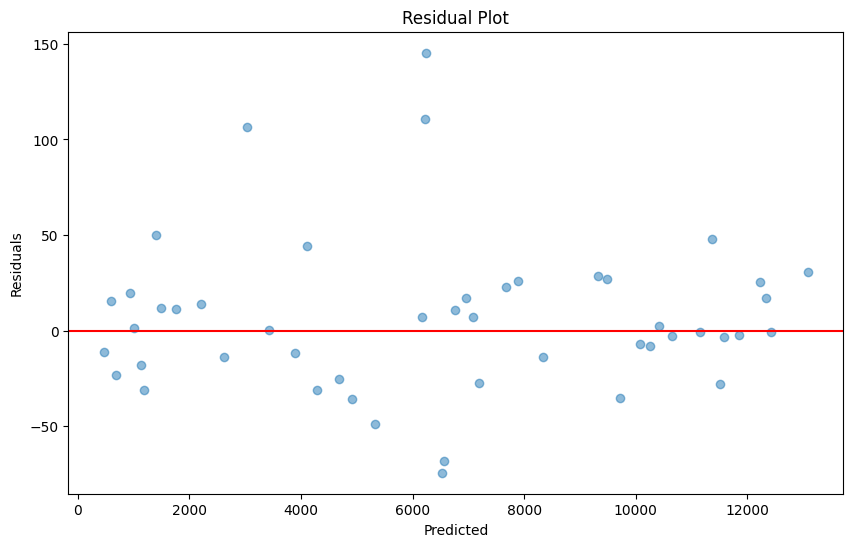

In [ ]:
# Residuals plot
plt.figure(figsize = (10,6))
residuals = y_test - random_forest_pred
plt.scatter(random_forest_pred, residuals, alpha=0.5)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r')
plt.show()

In [ ]:
# KDE plot
plt.figure(figsize = (10,6))
sns.kdeplot(y_test, label="Actual", shade=True)
sns.kdeplot(random_forest_pred, label="Predicted", shade=True)
plt.xlabel("NORMALISED_LAP_TIME_MS")
plt.ylabel("Density")
plt.title("Actual vs Predicted Distribution")
plt.legend()
plt.show()


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

best_lap = pd.read_csv("Best_Lap.csv")
filt_left = pd.read_excel("filtered_left.xlsx")
filt_right = pd.read_excel("filtered_right.xlsx")
turns = pd.read_csv("f1sim-ref-turns.csv")

turns = turns.loc[turns['TURN'].isin([1,2])]

fig = px.scatter(best_lap, x='WORLDPOSX', y='WORLDPOSY', color='LAP_DISTANCE', size='SPEED_KPH', 
                hover_data={'LAP_DISTANCE': True, 'LAP_TIME': True, 'THROTTLE': True, 'BRAKE': True, 'GEAR': True, 'LATERAL': True, 'SPEED_KPH': True, 'ENGINE_RPM': True, 'STEERING': True},
                title='Albert Park Turns 1 & 2')

fig.update_layout(
    height = 700,
    width = 1200
)

track_line_left = go.Scatter(
    x=filt_left['WORLDPOSX'],
    y=filt_left['WORLDPOSY'],
    mode='lines',
    line=dict(color='black', width=2.5),
    showlegend=False
)

track_line_right = go.Scatter(
    x=filt_right['WORLDPOSX'],
    y=filt_right['WORLDPOSY'],
    mode='lines',
    line=dict(color='black', width=2.5),
    showlegend=False
)

track_turns = go.Scatter(
    x=turns['APEX_X1'],
    y=turns['APEX_Y1'],
    mode='markers',
    marker=dict(color='blue', size=10, symbol='cross'),
    name='Turns',
    showlegend=False,
    text=['Turn 1', 'Turn 2'],  
    hoverinfo='text+x+y'
)

fig.add_trace(track_line_left)
fig.add_trace(track_line_right)
fig.add_trace(track_turns)

labels = [
    dict(
        x=turns['APEX_X1'][0],
        y=turns['APEX_Y1'][0],
        xref="x",
        yref="y",
        text="Turn 1",
        showarrow=True,
        arrowhead=7,
        ax=140,
        ay=-30,
        font=dict(size=14)
    ),
    dict(
        x=turns['APEX_X1'][1],
        y=turns['APEX_Y1'][1],
        xref="x",
        yref="y",
        text="Turn 2",
        showarrow=True,
        arrowhead=7,
        ax=-190,
        ay=-40,
        font=dict(size=14)
    ),

]


fig.update_layout(
    annotations=labels,
    xaxis=dict(showgrid=False),  
    yaxis=dict(showgrid=False, zeroline=False)
)

fig.show()


## XGBoost

In [0]:
# Read the data in and split into train and test sets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings('ignore')

data = pd.read_csv('trainingDatav3.1.csv')

# Drop rows with NA values from the data 
data.dropna(axis=0, inplace=True)

# Select features
y = data['NORMALISED_LAP_TIME_MS']
X = data[['d0_speed', 'd0_throttle', 'd0_brake', 'd0_lateral', 'd0_steering', 'd0_gear', 'd0_rpm',
'd10_speed', 'd10_throttle', 'd10_brake', 'd10_lateral', 'd10_steering', 'd10_gear', 'd10_rpm',
'd20_speed', 'd20_throttle', 'd20_brake', 'd20_lateral', 'd20_steering', 'd20_gear', 'd20_rpm',
'd30_speed', 'd30_throttle', 'd30_brake', 'd30_lateral', 'd30_steering', 'd30_gear', 'd30_rpm',
'd40_speed', 'd40_throttle', 'd40_brake', 'd40_lateral', 'd40_steering', 'd40_gear', 'd40_rpm',
'd45_speed', 'd45_throttle', 'd45_brake', 'd45_lateral', 'd45_steering', 'd45_gear', 'd45_rpm',
'd50_speed', 'd50_throttle', 'd50_brake', 'd50_lateral', 'd50_steering', 'd50_gear', 'd50_rpm',
'd60_speed', 'd60_throttle', 'd60_brake', 'd60_lateral', 'd60_steering', 'd60_gear', 'd60_rpm',
'd70_speed', 'd70_throttle', 'd70_brake', 'd70_lateral', 'd70_steering', 'd70_gear', 'd70_rpm',
'd80_speed', 'd80_throttle', 'd80_brake', 'd80_lateral', 'd80_steering', 'd80_gear', 'd80_rpm',
'd90_speed', 'd90_throttle', 'd90_brake', 'd90_lateral', 'd90_steering', 'd90_gear', 'd90_rpm']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Hold parameters for XGBoost model
grid = {

    'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Create a GridSearch for XGBoost
grid_search = GridSearchCV(estimator=xgb_model, param_grid=grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the GridSearch with training data 
grid_search.fit(X_train, y_train)

# Determined optimal parameters for XGBoost
print('Optimal Parameters: {}'.format(grid_search.best_params_))

# Get the best performing XGBoost model
xgb_model = grid_search.best_estimator_

# Run predictions 
xgb_model_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, xgb_model_pred)
rmse = np.sqrt(mean_squared_error(y_test, xgb_model_pred))
mae = mean_absolute_error(y_test, xgb_model_pred)
r2 = r2_score(y_test, xgb_model_pred)
print('MSE = {}'.format(mse))
print('RMSE = {}'.format(np.sqrt(mse)))
print('MAE = {}'.format(mae))
print('R2 = {}'.format(r2))

# Feature importance scores - limited interpretability
feature_importances = xgb_model.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance}')


Optimal Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 1, 'n_estimators': 100, 'subsample': 1.0}
MSE = 37981174.42600732
RMSE = 6162.886858121551
MAE = 2441.108497953256
R2 = 0.6333110611648425


In [ ]:
# Calculating ratio of total MSE per model

total = 37981174.42600732 + 45161900.45004104 + 67754631.33117256 + 67538183.70671874

xgboost_perc = 37981174.42600732 / total
print(xgboost_perc)
randomforest_perc = 45161900.45004104 / total
print(randomforest_perc)
lasso_perc = 67754631.33117256 / total
print(lasso_perc)
elasticnet_perc = 67538183.70671874 / total
print(elasticnet_perc)

0.17387790276117773
0.20675128280354538
0.31018085607574297
0.30918995835953395


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d1a667d0-3328-49c8-aca0-3e3471e404c5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>